# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [56]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

<AxesSubplot:>

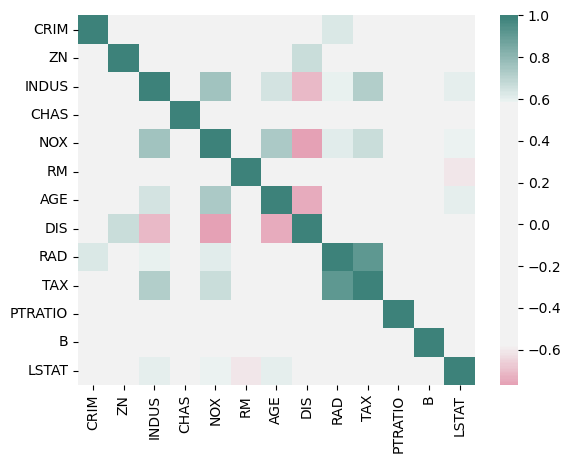

In [30]:
cmap = sns.diverging_palette(h_neg=0, h_pos=180, sep=150, center='light', as_cmap=True)
sns.heatmap(X.corr(), center=0, cmap=cmap)

In [ ]:
AGE, DIS, RAD, TAX

### 3. Separe os dados em validação e teste

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size= 0.3, random_state= 100 )

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [36]:
reg_1 = DecisionTreeRegressor(max_depth=8)
reg_1 = reg_1.fit(X_train,y_train)

reg_2 = DecisionTreeRegressor(max_depth=2)
reg_2 = reg_2.fit(X_train,y_train)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [39]:
reg_1.score(X_test, y_test)

0.7362343076547788

In [40]:
reg_2.score(X_test, y_test)

0.6116939327685114

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [ ]:
A árvore com profundidade 8

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

In [57]:
tree.export_text(reg_1)

'|--- feature_5 <= 6.95\n|   |--- feature_12 <= 14.75\n|   |   |--- feature_5 <= 6.55\n|   |   |   |--- feature_12 <= 7.57\n|   |   |   |   |--- feature_11 <= 393.29\n|   |   |   |   |   |--- feature_7 <= 1.69\n|   |   |   |   |   |   |--- value: [27.50]\n|   |   |   |   |   |--- feature_7 >  1.69\n|   |   |   |   |   |   |--- feature_10 <= 19.95\n|   |   |   |   |   |   |   |--- feature_2 <= 4.89\n|   |   |   |   |   |   |   |   |--- value: [22.62]\n|   |   |   |   |   |   |   |--- feature_2 >  4.89\n|   |   |   |   |   |   |   |   |--- value: [23.88]\n|   |   |   |   |   |   |--- feature_10 >  19.95\n|   |   |   |   |   |   |   |--- feature_4 <= 0.53\n|   |   |   |   |   |   |   |   |--- value: [21.17]\n|   |   |   |   |   |   |   |--- feature_4 >  0.53\n|   |   |   |   |   |   |   |   |--- value: [23.10]\n|   |   |   |   |--- feature_11 >  393.29\n|   |   |   |   |   |--- feature_9 <= 262.00\n|   |   |   |   |   |   |--- feature_6 <= 26.60\n|   |   |   |   |   |   |   |--- feature_9